### Creating ANN using PyTorch

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
df = pd.read_csv('diabetes.csv')
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [3]:
df.shape

(768, 9)

In [4]:
df.isnull().sum()

Pregnancies                 0
Glucose                     0
BloodPressure               0
SkinThickness               0
Insulin                     0
BMI                         0
DiabetesPedigreeFunction    0
Age                         0
Outcome                     0
dtype: int64

In [5]:
# numeric colums convert into categorical column for sns.pairplot
df['Outcome'] = np.where(df['Outcome']==1, "Diabetes", "No Diabetes")

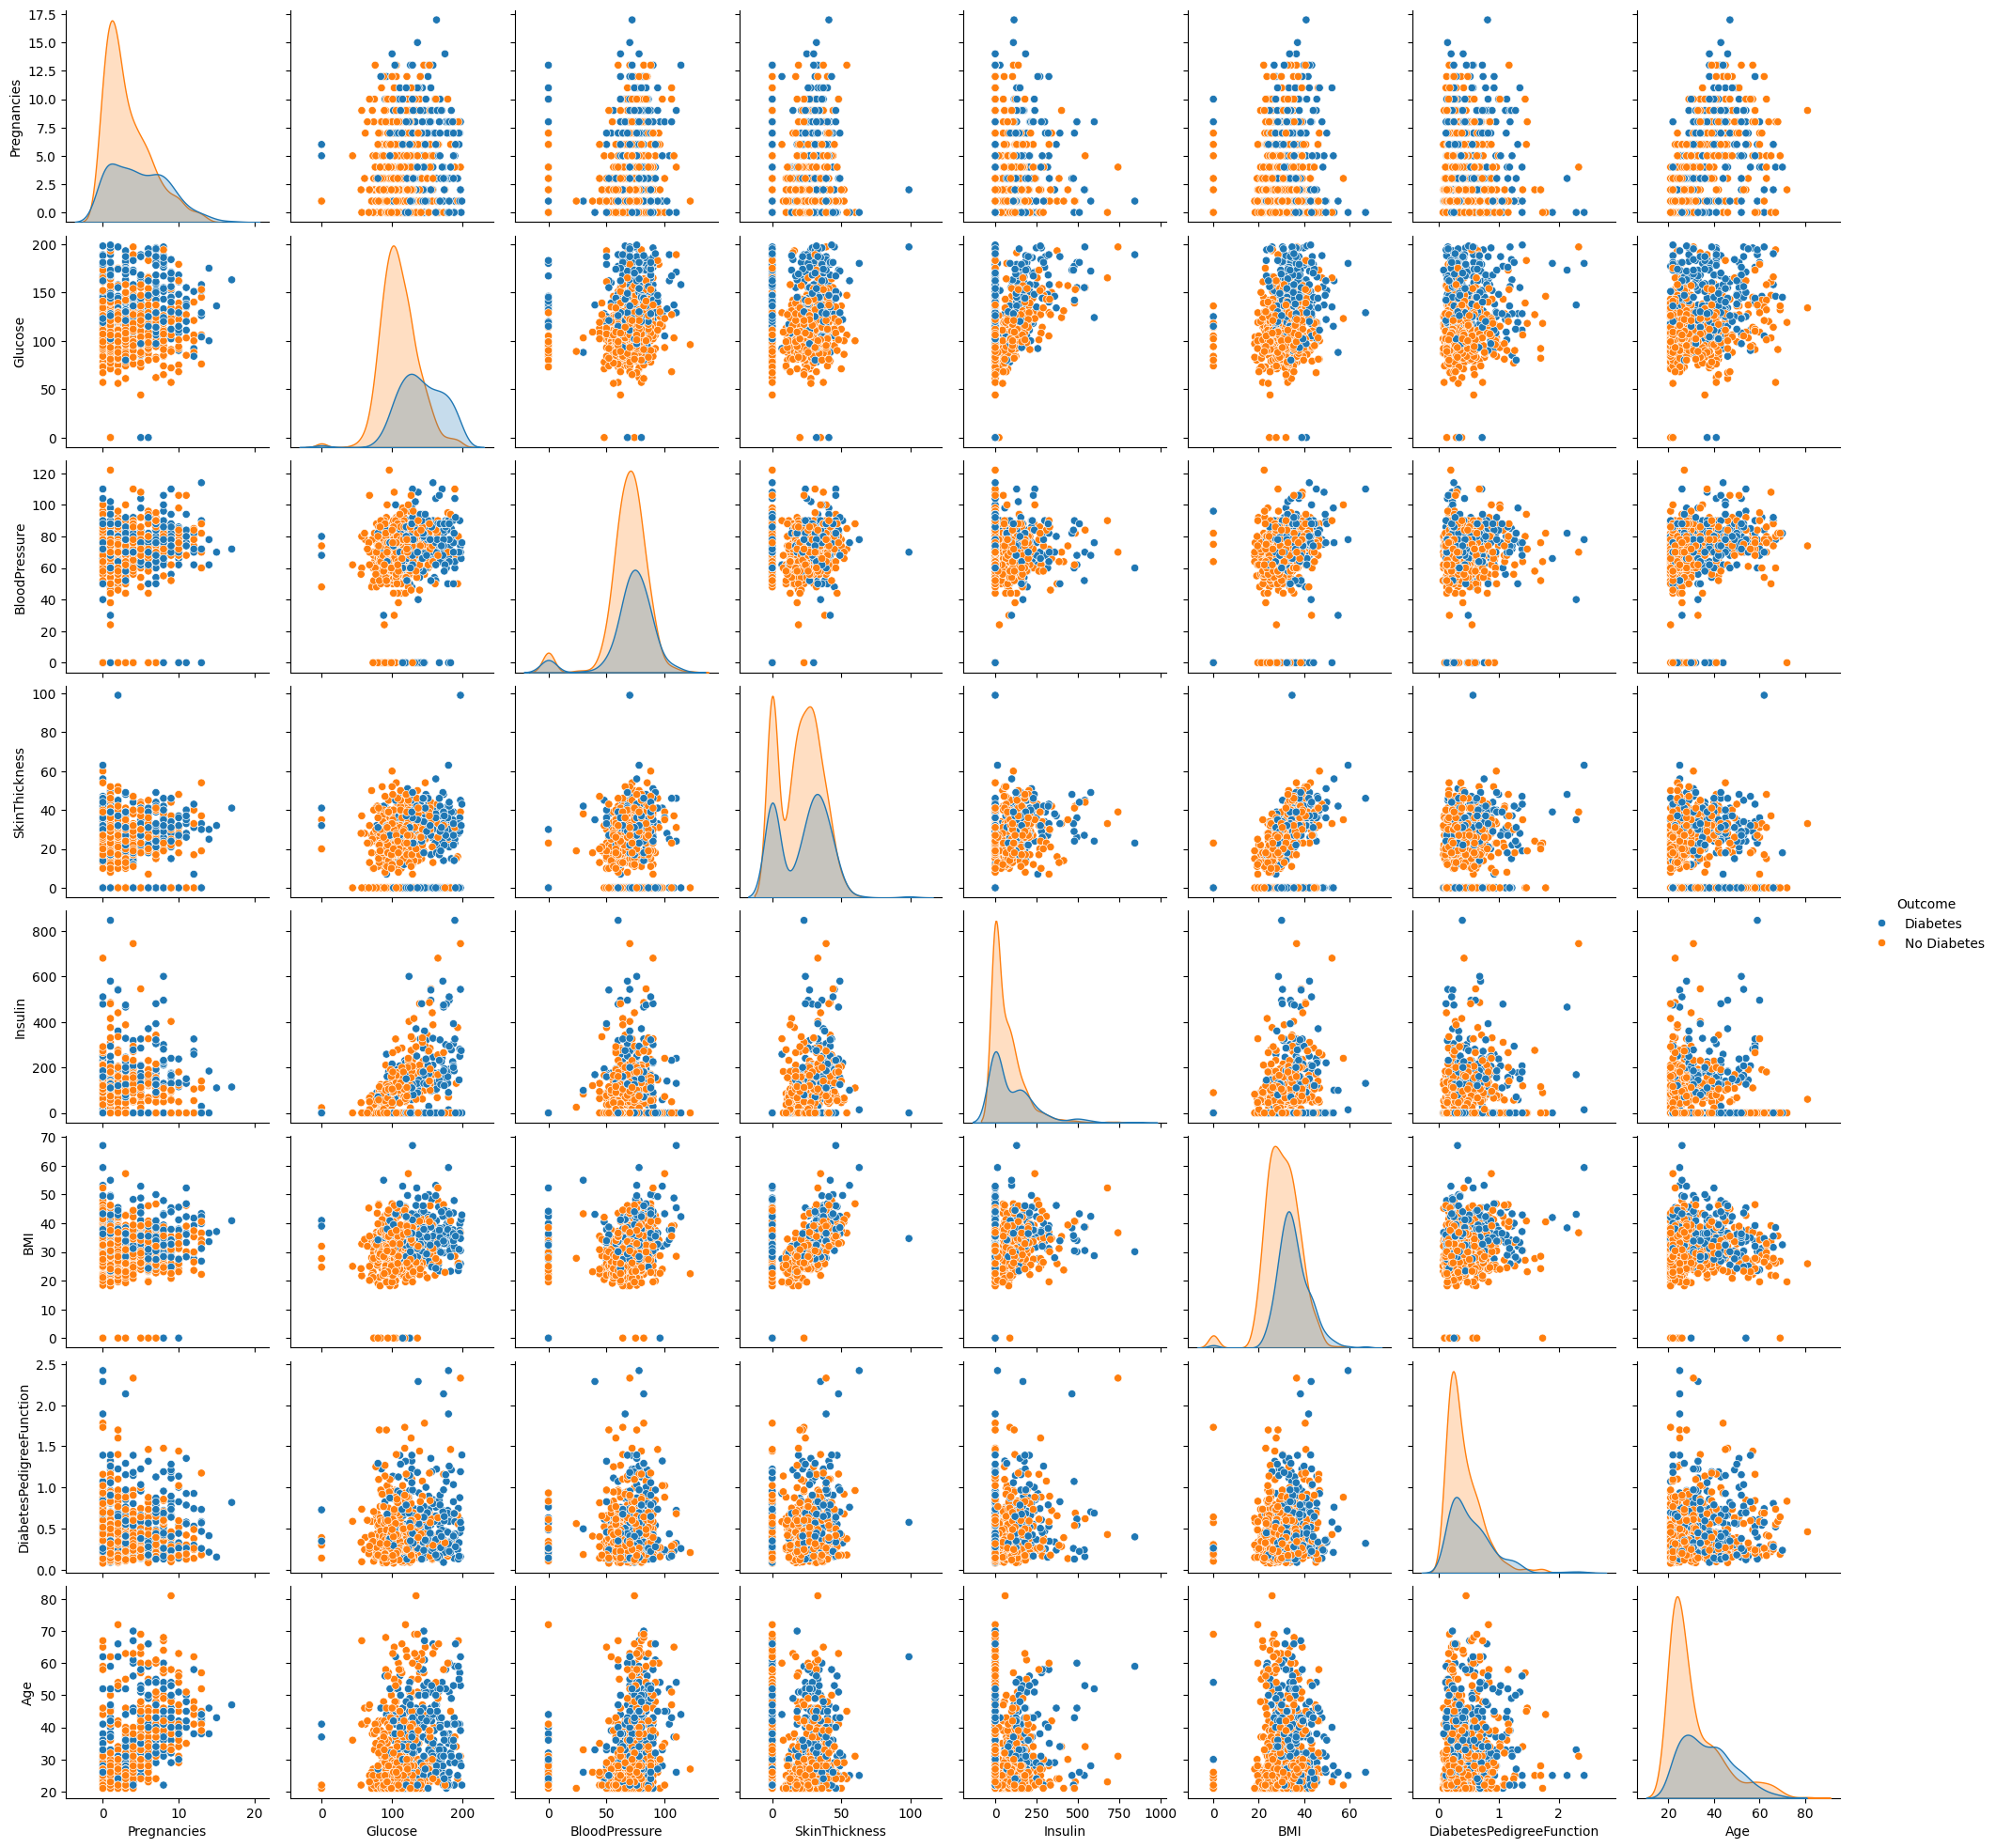

In [6]:
sns.pairplot(df, hue="Outcome")
plt.show()

In [7]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,Diabetes
1,1,85,66,29,0,26.6,0.351,31,No Diabetes
2,8,183,64,0,0,23.3,0.672,32,Diabetes
3,1,89,66,23,94,28.1,0.167,21,No Diabetes
4,0,137,40,35,168,43.1,2.288,33,Diabetes


In [8]:
df['Outcome'] = df['Outcome'].replace({
    "Diabetes": 1,
    "No Diabetes": 0
})

In [9]:
df.head()

,Pregnancies,Glucose,BloodPressure,SkinThickness,Insulin,BMI,DiabetesPedigreeFunction,Age,Outcome
0,6,148,72,35,0,33.6,0.627,50,1
1,1,85,66,29,0,26.6,0.351,31,0
2,8,183,64,0,0,23.3,0.672,32,1
3,1,89,66,23,94,28.1,0.167,21,0
4,0,137,40,35,168,43.1,2.288,33,1


In [10]:
# Independent and Dependent Variable
X = df.drop(['Outcome'], axis=1).values # Convert it into array
y = df['Outcome'].values # Convert it into array

In [11]:
# Train - Test Split
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

In [12]:
print(X_train.shape, y_train.shape)
print(X_test.shape, y_test.shape)

(614, 8) (614,)
(154, 8) (154,)


In [13]:
# Libraries for PyTorch
import torch
import torch.nn as nn
import torch.nn.functional as F

In [14]:
# Creating Tensor
X_train = torch.FloatTensor(X_train)
X_test = torch.FloatTensor(X_test)
y_train = torch.LongTensor(y_train)
y_test = torch.LongTensor(y_test)

In [15]:
df.shape

(768, 9)

In [16]:
# Create Model with PyTorch

class ANN_Model(nn.Module):
    def __init__(self, input_features=8, hidden1=20, hidden2=20, output_features=2):
        super().__init__()
        self.f_connected1 = nn.Linear(input_features, hidden1) # input_features --> hidden1
        self.f_connected2 = nn.Linear(hidden1, hidden2) # hidden1 --> hidden2
        self.out = nn.Linear(hidden2, output_features) # hidden2 --> output_features
    
    def forward(self, x):
        x = F.relu(self.f_connected1(x))
        x = F.relu(self.f_connected2(x))
        x = self.out(x)
        return x

In [17]:
# Instantiate ANN_Model
torch.manual_seed(20)
model = ANN_Model()

In [18]:
model.parameters

<bound method Module.parameters of ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)>

In [19]:
# Backward Propogation --> Define the Loss_function, define the optimizer
loss_function = nn.CrossEntropyLoss()
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)

In [20]:
epochs = 500
final_losses = []
for i in range(epochs):
    i = i + 1
    y_pred = model.forward(X_train)
    loss = loss_function(y_pred, y_train)
    final_losses.append(loss)
    if (i % 10) == 1:
        print(f"Epoch number : {i} & Loss : {loss.item()}")
    optimizer.zero_grad()
    loss.backward()
    optimizer.step()

Epoch number : 1 & Loss : 3.436734199523926
Epoch number : 11 & Loss : 0.7937090992927551
Epoch number : 21 & Loss : 0.6008101105690002
Epoch number : 31 & Loss : 0.5868991613388062
Epoch number : 41 & Loss : 0.5716009736061096
Epoch number : 51 & Loss : 0.5585745573043823
Epoch number : 61 & Loss : 0.5484763383865356
Epoch number : 71 & Loss : 0.5397629737854004
Epoch number : 81 & Loss : 0.5324785113334656
Epoch number : 91 & Loss : 0.5249089598655701
Epoch number : 101 & Loss : 0.5180441737174988
Epoch number : 111 & Loss : 0.511354386806488
Epoch number : 121 & Loss : 0.5039476752281189
Epoch number : 131 & Loss : 0.49674227833747864
Epoch number : 141 & Loss : 0.48729294538497925
Epoch number : 151 & Loss : 0.48093003034591675
Epoch number : 161 & Loss : 0.47318828105926514
Epoch number : 171 & Loss : 0.4668591022491455
Epoch number : 181 & Loss : 0.4609060287475586
Epoch number : 191 & Loss : 0.4549429416656494
Epoch number : 201 & Loss : 0.44978800415992737
Epoch number : 211 & 

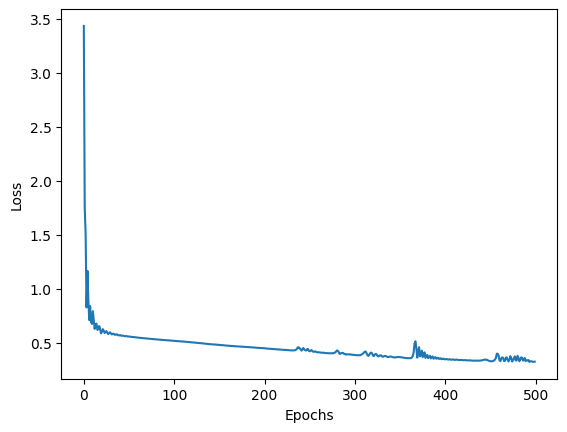

In [22]:
# Plot the loss function
fnl_ls = [fl.item() for fl in final_losses]
plt.plot(range(epochs), fnl_ls)
plt.ylabel('Loss')
plt.xlabel('Epochs')
plt.show()

In [26]:
# Prediction on X_test
predictions = []
with torch.no_grad():
    for i, data in enumerate(X_test):
        y_pred = model(data)
        # print(np.argmax(y_pred).item())
        predictions.append(np.argmax(y_pred).item())

In [35]:
# Accuracy Score
from sklearn.metrics import accuracy_score

accuracy = accuracy_score(y_test, predictions)
print(f"Accuracy : {accuracy}")

Accuracy : 0.7597402597402597


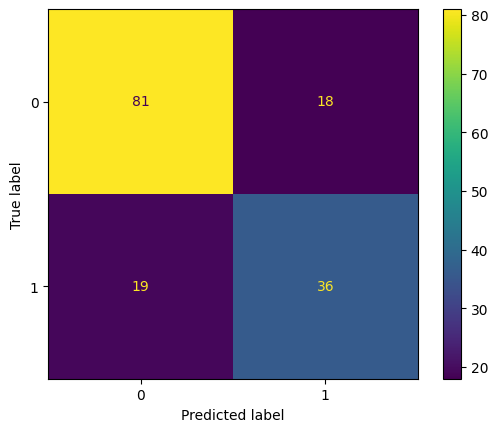

In [34]:
# Plot Confusion Matrix
from sklearn.metrics import confusion_matrix, ConfusionMatrixDisplay

cm = confusion_matrix(y_test, predictions)
cm_dis = ConfusionMatrixDisplay(confusion_matrix=cm, display_labels=[0, 1])
cm_dis.plot()

In [36]:
# Save the model
torch.save(model, 'diabetes.pt')

In [37]:
# Load model
load_model = torch.load('diabetes.pt')
load_model.eval()

ANN_Model(
  (f_connected1): Linear(in_features=8, out_features=20, bias=True)
  (f_connected2): Linear(in_features=20, out_features=20, bias=True)
  (out): Linear(in_features=20, out_features=2, bias=True)
)

In [45]:
# Prediction on new data
list(df.iloc[0,:-1])
lst1 = [6.0, 135.0, 80.0, 40.0, 0.0, 25.6, 0.627, 50.0]
new_data = torch.FloatTensor(lst1)

# Predict label on new data
with torch.no_grad():
    print(load_model(new_data))
    print(np.argmax(load_model(new_data)).item())

tensor([1.9278, 0.7592])
0
